## Import libraries and settings

In [1]:
# data wrangling libraries
import numpy as np
import pandas as pd

# plotting libraries matplotlib and seaborn
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# set some nice plotting settings
sns.set(
    style='ticks',
    font_scale=2.0,
    rc={'axes.spines.top': False,
        'axes.spines.right': False,
        'figure.figsize': (8, 6)},
)

# import statsmodels for modeling purposes
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Now we read our data and check what it looks like

In [2]:
df = pd.read_csv('advertising_new.csv')
df.head(3)

,TV,radio,newspaper,flyers,action_period,sales
0,230.1,37.8,69.2,5.620768,normal,22.100
1,44.5,39.3,45.1,15.580845,reduction,20.219
2,17.2,45.9,69.3,7.476355,reduction,18.927


## Our goal is to see which variables influence our sales: we start with TV

#### When we create the scatterplot of TV together with sales the pattern is quite clear:<br><br>The higher the spend on TV ads, the more we sell.

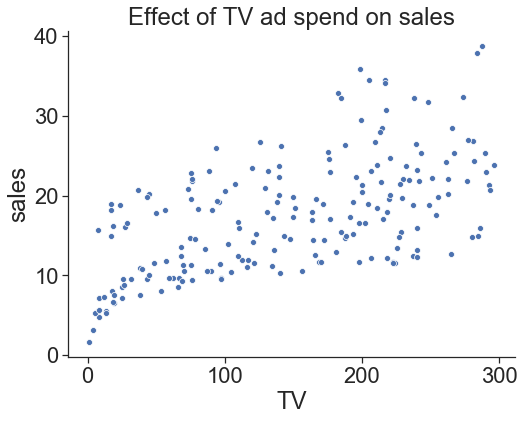

In [3]:
sns.scatterplot(data=df, x='TV', y='sales')
plt.title('Effect of TV ad spend on sales');

#### This relationship can be visualized by a linear regression line:<br><br>$Y = a + b X + \epsilon$
#### a is the intercept
#### b is the slope
#### $\epsilon\$ is the residual error

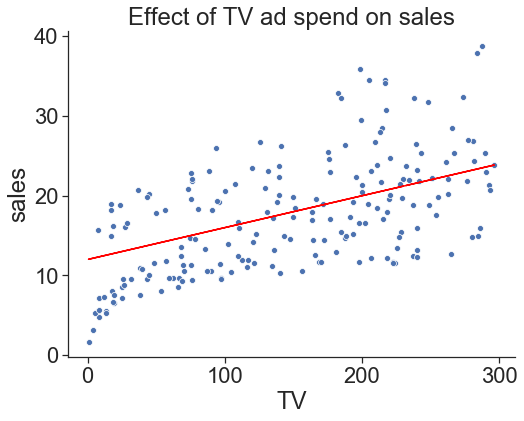

In [4]:
manual_line = 12.0 + 0.040 * df['TV']

sns.scatterplot(data=df, x='TV', y='sales')
plt.title('Effect of TV ad spend on sales');

plt.plot(df['TV'], manual_line, color='red');

## Questions: 
#### 1) What does the line look line, if X has no effect on Y?
#### 2) What does that tell you about b?
#### 3) In this case, what is the interpretation of a?

## Exercise:
#### Adjust the variable manual line in the example above to improve my line
#### Tell me what you think should be the intercept a and the slope b to get the best line

## Okay, there must be better ways to find the best line and there is: (Ordinary) Least Squares

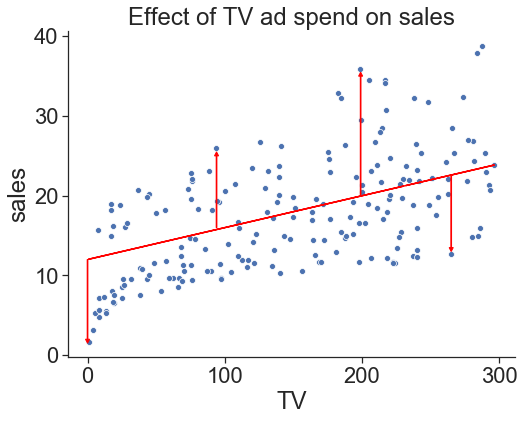

In [5]:
manual_line = 12.0 + 0.040 * df['TV']

ax = sns.scatterplot(data=df, x='TV', y='sales')
ax.set_title('Effect of TV ad spend on sales');

plt.plot(df['TV'], manual_line, color='red')

arrow_data = [[0, 12, 0, -10], [94, 16, 0, 9], [199, 20, 0, 15], [265, 22.5, 0, -9]]
for coor in arrow_data:
    ax.arrow(x=coor[0], y=coor[1], dx=coor[2], dy=coor[3],
             width=0.5, color='red', head_length=0.5, head_width=3.0);

#### Line parameters are calculated by minimizing quared residuals:
#### $ \min \sum \epsilon^2$
#### We want to minimize the errors made by the line:
#### Question: why are we taking squares?

## Let's use library statsmodels to calculate the best least squares

In [6]:
formula = 'sales ~ 1 + TV'

tv_model = smf.ols(formula=formula, data=df).fit()

In [7]:
tv_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     108.3
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           1.65e-20
Time:                        14:21:41   Log-Likelihood:                -635.25
No. Observations:                 200   AIC:                             1274.
Df Residuals:                     198   BIC:                             1281.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0939      0.819     12.331      0.000       8.480      11.708
TV             0.0501      0.005     10.407      0.000       0.041       0.060
==============================================================================
Omnibus:                       10.424   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.020
Skew:                           0.553   Prob(JB):                      0.00405
Kurtosis:                       2.688   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Resulting equation:
#### $Y = 10.0939 + 0.0501 \times X + \epsilon$

### Questions:
#### How many extra sales are generated when you spend 1 additional unit on TV ads?
#### If you don't spend anything on tv ads, what would you expect your sales to be?
#### How many sales are expected when we spend 200 on TV ads?
#### And what would be the sales if we spend 10000 on TV ads?

### Let's plot the line statsmodels found:

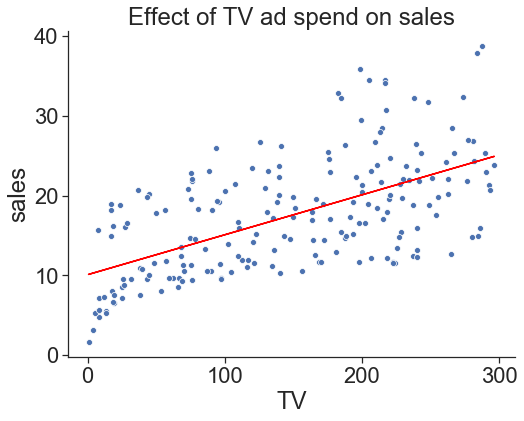

In [57]:
tv_formula_ols = 10.0939 + 0.0501 * df['TV']

sns.scatterplot(df['TV'], df['sales'])
plt.title('Effect of TV ad spend on sales')
plt.plot(df['TV'], tv_formula_ols , color='red');

## So we now have our first model, but is it any good?
#### We can look at $R^2$ (R-squared) to check the goodness of fit
#### R-squared is the percentage variation in Y explained by the variable X. 
#### A score of 1.0 is a perfect fit, a score of 0.0 is just predicting the mean

### What does our R Squared look like?

In [18]:
formula = 'sales ~ 1'

mean_model = smf.ols(formula=formula, data=df).fit()
mean_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 03 Mar 2020   Prob (F-statistic):                nan
Time:                        14:25:20   Log-Likelihood:                -678.88
No. Observations:                 200   AIC:                             1360.
Df Residuals:                     199   BIC:                             1363.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.4548      0.511     34.152      0.000      16.447      18.463
==============================================================================
Omnibus:                        7.336   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.438
Skew:                           0.472   Prob(JB):                       0.0243
Kurtosis:                       3.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

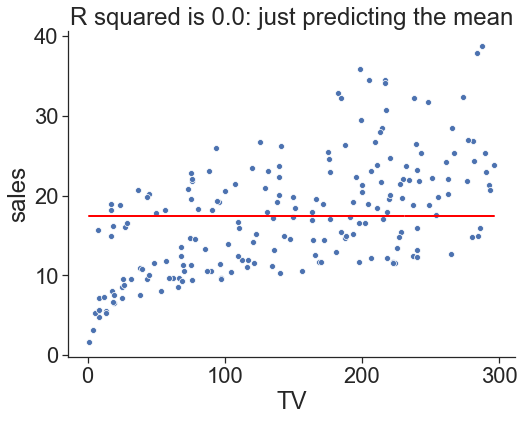

In [47]:
mean_formula_ols = 17.4548 + 0 * df['TV']

sns.scatterplot(df['TV'], df['sales'])
plt.plot(df['TV'], mean_formula_ols, color='red')
plt.title('R squared is 0.0: just predicting the mean');

In [11]:
formula = 'sales ~ newspaper'

newspaper_model = smf.ols(formula=formula, data=df).fit()
newspaper_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     7.683
Date:                Tue, 03 Mar 2020   Prob (F-statistic):            0.00611
Time:                        14:21:41   Log-Likelihood:                -675.07
No. Observations:                 200   AIC:                             1354.
Df Residuals:                     198   BIC:                             1361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4950      0.868     17.860      0.000      13.784      17.206
newspaper      0.0641      0.023      2.772      0.006       0.019       0.110
==============================================================================
Omnibus:                        7.592   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.911
Skew:                           0.482   Prob(JB):                       0.0191
Kurtosis:                       2.860   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

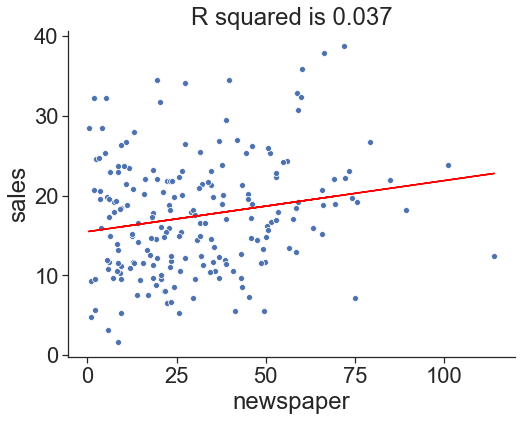

In [39]:
newspaper_formula_ols = 15.4950 + 0.0641 * df['newspaper']

sns.scatterplot(df['newspaper'], df['sales'])
plt.plot(df['newspaper'], newspaper_formula_ols, color='red')
plt.title(f'R squared is {newspaper_model.rsquared.round(3)}');

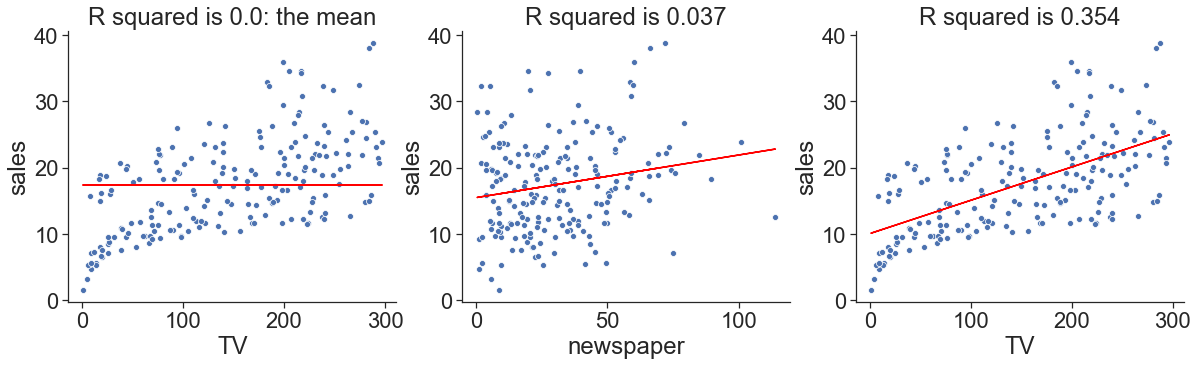

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

plt.sca(ax[0])
sns.scatterplot(df['TV'], df['sales'])
plt.plot(df['TV'], mean_formula_ols, color='red')
plt.title('R squared is 0.0: the mean')

plt.sca(ax[1])
sns.scatterplot(df['newspaper'], df['sales'])
plt.plot(df['newspaper'], newspaper_formula_ols, color='red')
plt.title(f'R squared is {newspaper_model.rsquared.round(3)}')

plt.sca(ax[2])
sns.scatterplot(df['TV'], df['sales'])
plt.plot(df['TV'], tv_formula_ols, color='red')
plt.title(f'R squared is {tv_model.rsquared.round(3)}')